In [1]:
import numpy as np

In [2]:
from pyquantum.qft.circuit import QFTCircuit
from pyquantum.circuit.circuit import Circuit
from pyquantum.qft.graph import Graph
from pyquantum.core.gate import *

# 1 - Transformation de Fourier Quantique sur 3 Qubits

En utilisant les différentes portes implémentées précédemment, on crée la classe `QFTCircuit` qui permet de construire le circuit de la QFT pour un nombre fixé de Qubits.

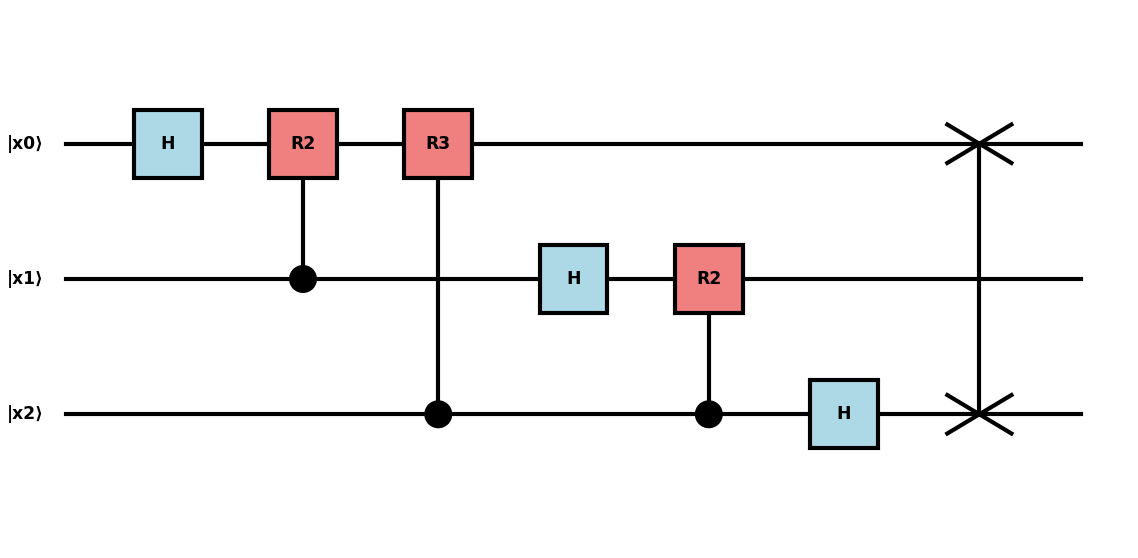

In [3]:
qft3 = QFTCircuit(n_qubits=3)
qft3.draw()

On peut ensuite observer la matrice équivalente à ce circuit, soit les racines $n$-ièmes de l'unité (avec $n = 2^{#qubits}$).

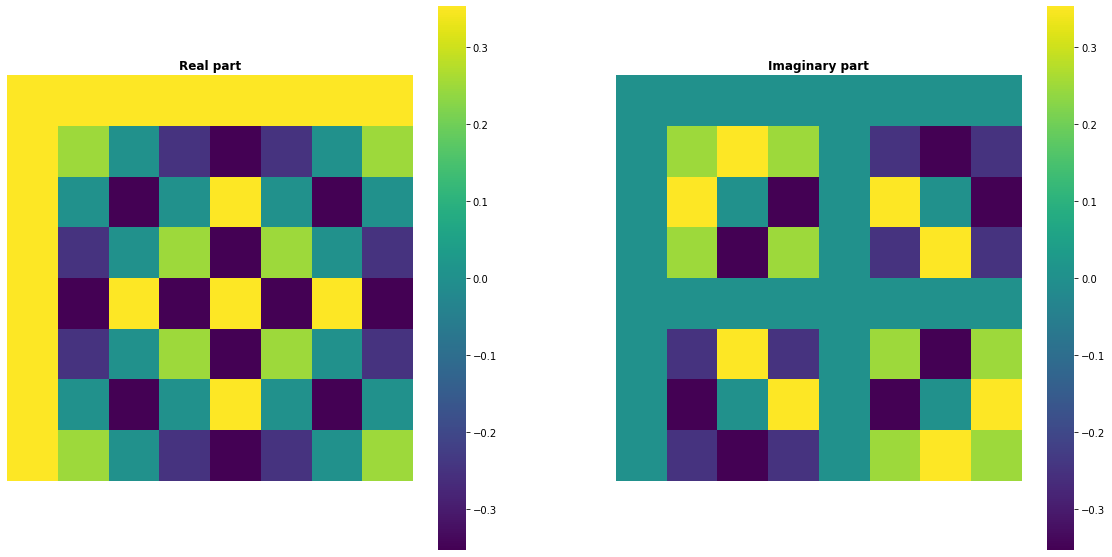

3-Qubits circuit

In [4]:
qft3

# 2 - Transformation de Fourier Quantique sur 5 Qubits

On peut ensuite observer le circuit pour différents nombre de Qubits.

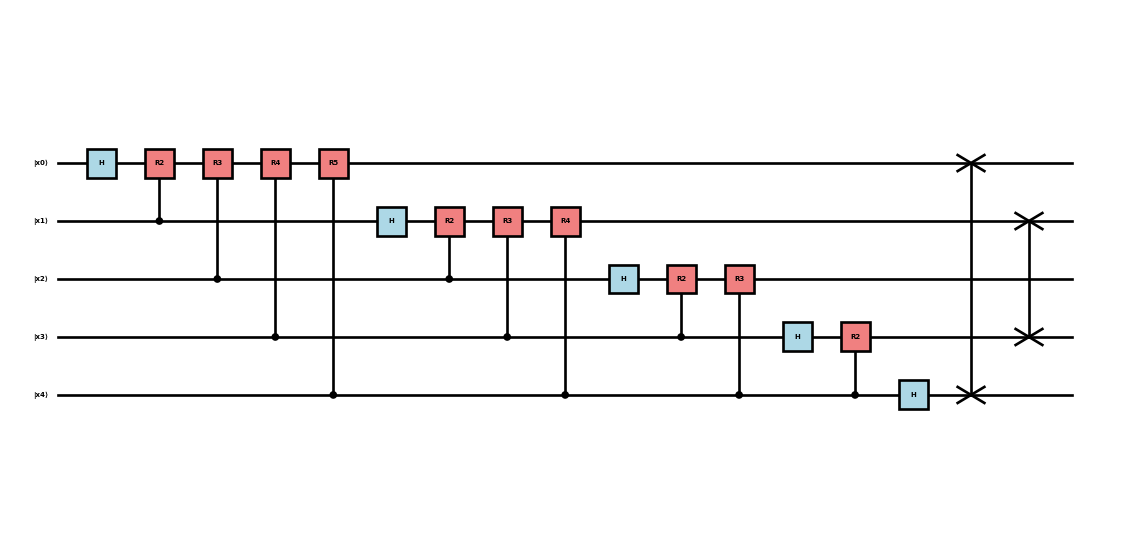

In [5]:
qft5 = QFTCircuit(5)
qft5.draw()

# 3 - 7Qubits Quantum Fourier Transform and error

Lorsque l'on monte en Qubits, la dimension de la matrice équivalente croît fortement.

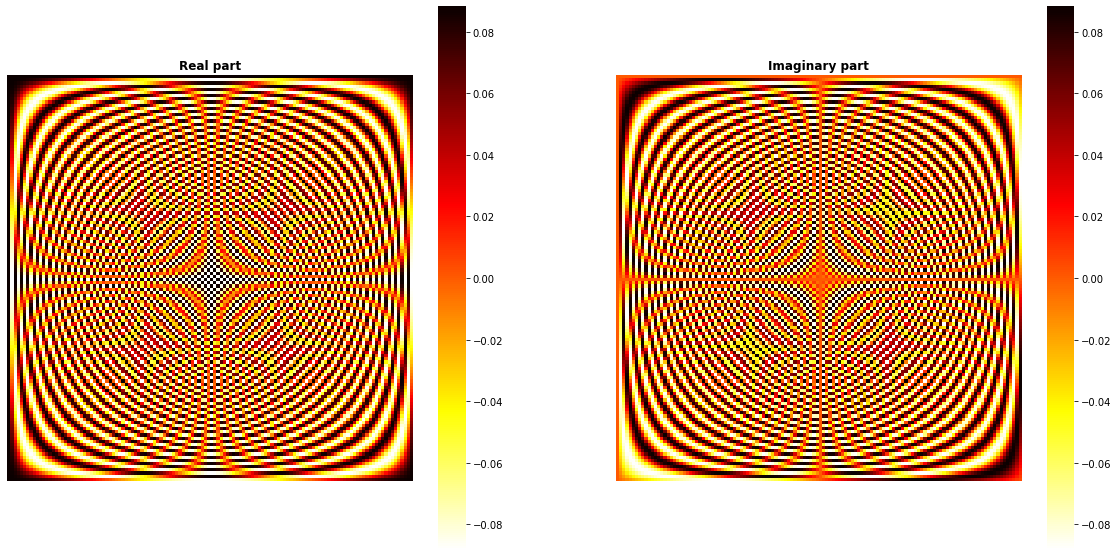

7-Qubits circuit

In [11]:
qft7 = QFTCircuit(7)
qft7.set_settings(cmap='hot_r', cbar=True)
qft7

On peut alors comparer cette matrice à la matrice implémentée dans `gate.py`, calculée directement avec les racines $n$-ièmes de l'unité. On observe une erreur de l'ordre de $1e^{-6}$, sûrement due à des erreurs d'arrondi de la part de python.

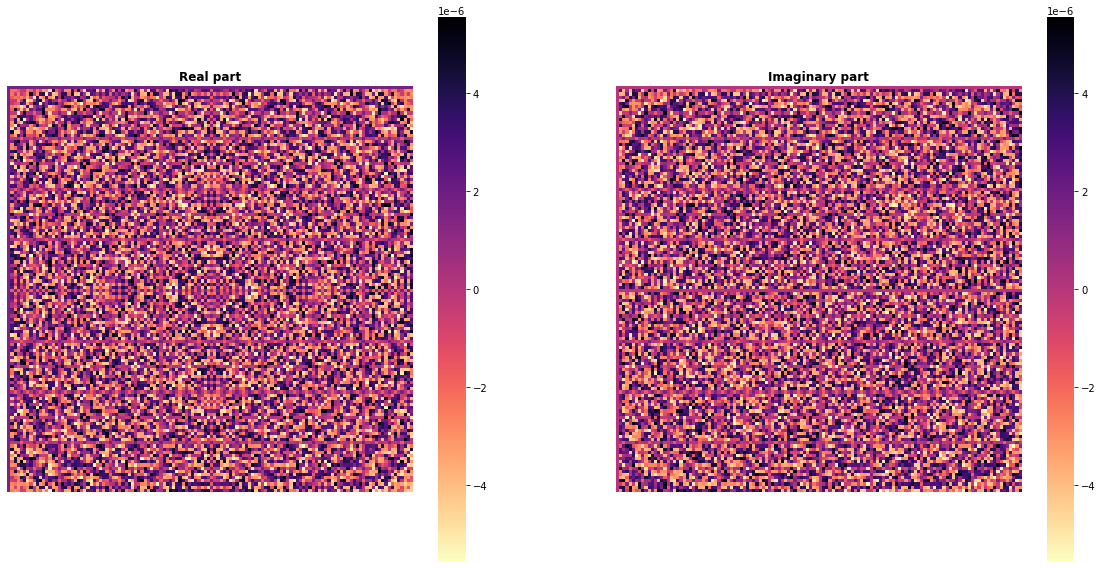

In [15]:
N_QUBITS = 7
DIFFERENCE = qft_matrix(n_qubits=N_QUBITS) - QFTCircuit(n_qubits=N_QUBITS).matrix
Circuit().set_settings(cbar=True, cmap='magma_r').heatmap(DIFFERENCE)

# 4 - Applying the QFT

À présent, on peut utiliser ce circuit pour décomposer un signal en ses différentes fréquences. Ici on teste sur une sinusoïde composée de deux sinus de différentes fréquences : 5 et 8. On retrouve bien deux pics en 5 et 8 avec un rapport de 2 en amplitude.

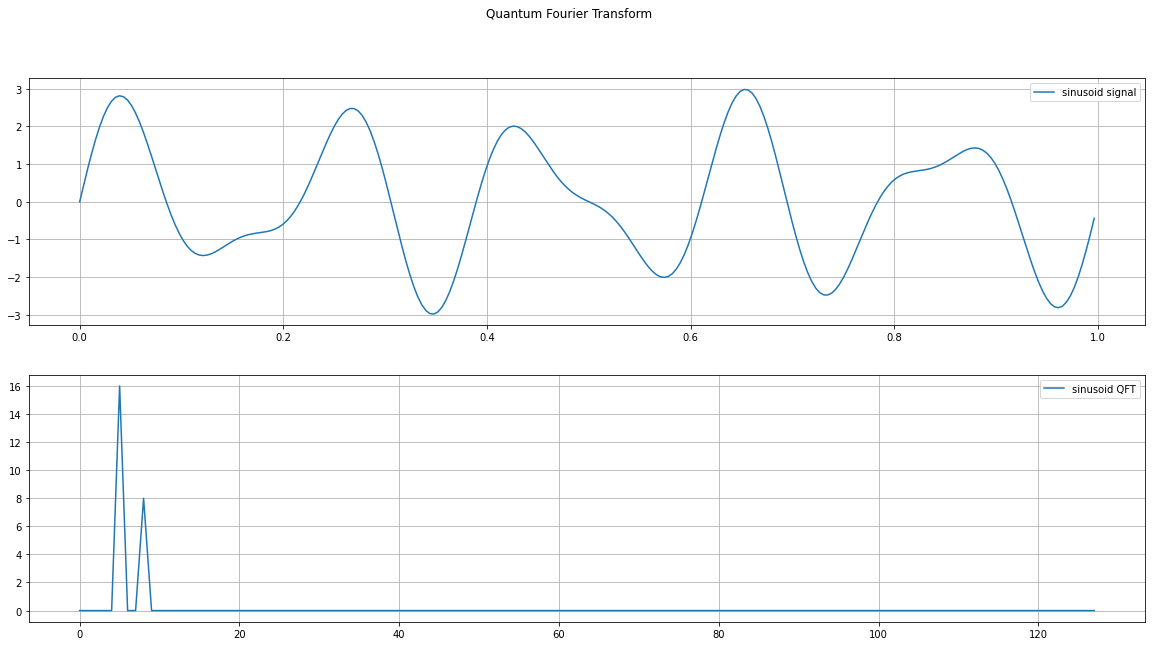

In [8]:
graph = Graph('Quantum Fourier Transform')
graph.sinusoid(params={np.sin: {5: 2, 8: 1}}, n_qubits=8)
graph.show()

On peut également créer notre propre fonction et la décomposer avec la QFT. Pour exemple, on implémente ci-dessous le signal triangle et le signal carré.

In [9]:
def square_wave(x, amplitude=1, frequency=1):
    signal = amplitude * (np.floor(x * 2 * frequency) % 2)
    return signal


def triangular_wave(x, amplitude=1, frequency=1):
    signal = amplitude * 2 * abs(x * frequency - np.floor(x * frequency + 1 / 2))
    return signal

On affiche sur un même graphique trois fonctions et on observe leurs transformées de Fourier respectives, qui correspondent bien à ce qu'on attendait.

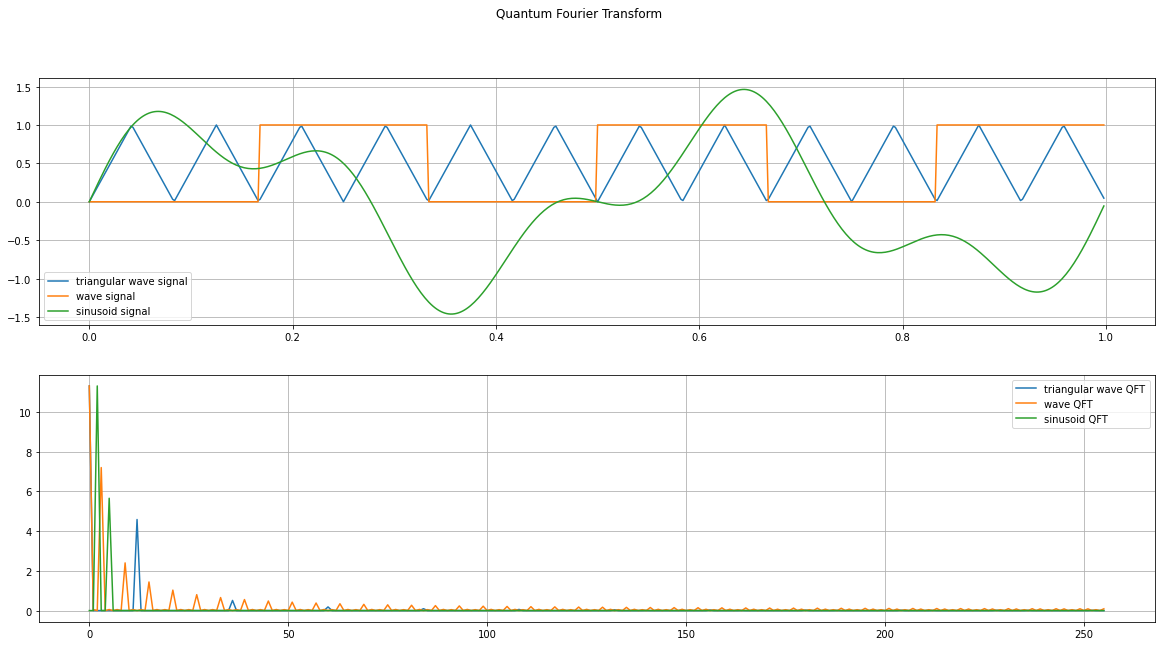

In [18]:
graph = Graph('Quantum Fourier Transform')
graph.personalized(function=triangular_wave, params=(1, 12), n_qubits=9, label='triangular wave')
graph.personalized(function=square_wave, params=(1, 3), n_qubits=9, label='wave')
graph.sinusoid(params={np.sin: {5: 0.5, 2: 1}}, n_qubits=9)
graph.show()